# EE969 (Computer Vision: Modern Perspective)

## Assignment 1  

Name: Akshay Kakar

Roll Number:

---

Q1. Write a program from scratch to apply the pair of Sobel filters to any grayscale image. Compute the absolute values of the horizontal and vertical filter responses, and then generate the final edge map by performing pixel-wise averaging of the two results.  

Solution

Notes:

1. Images:
    1. The Sobel filters were applied to a random image extracted from ChestMNIST (within the MedMNIST collection of biomedical images)
    2. The ChestMNIST collections consists of 112,120 grayscale images with a default size of 28 X 28 pixels.
    3. Further details can be found at https://medmnist.com/

2. Filter:
    1. The Sobel filter : https://en.wikipedia.org/wiki/Sobel_operator

Code:


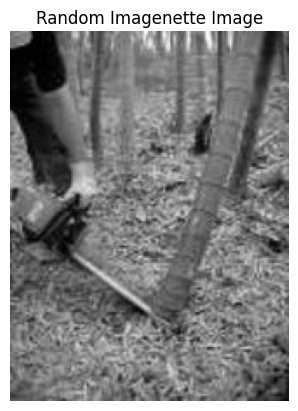

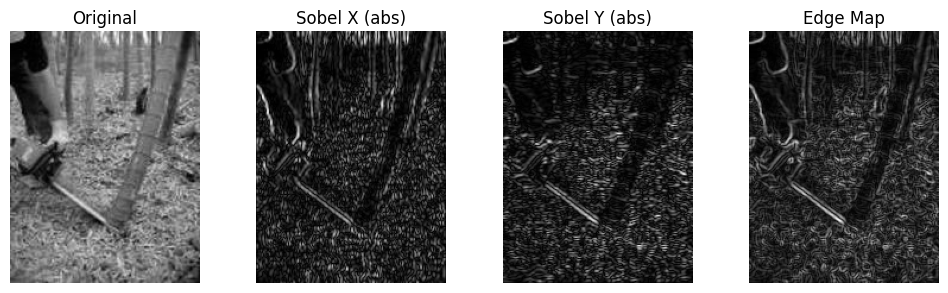

In [9]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image
import matplotlib.pyplot as plt
import random
import torchvision
from torchvision import datasets, transforms


import os

# Download and extract Imagenette if not present
if not os.path.exists('imagenette2-160'):
    os.system('wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz')
    os.system('tar -xf imagenette2-160.tgz')

data_dir = './imagenette2-160/val'  # Use val or train split as needed


dataset = datasets.ImageFolder(
    data_dir,
    transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
)
random_idx = random.randint(0, len(dataset) - 1)
img, label = dataset[random_idx]
img = (img.squeeze().numpy() * 255).astype(np.uint8)

# Plot the randomly selected image
plt.imshow(img, cmap='gray')
plt.title("Random Imagenette Image")
plt.axis('off')
plt.show()

# Define Sobel kernels
sobel_horizontal = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]], dtype=np.float32)
sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]], dtype=np.float32)

# Apply Sobel filters
response_h = convolve2d(img, sobel_horizontal, mode='same', boundary='symm')
response_v = convolve2d(img, sobel_vertical, mode='same', boundary='symm')

# Compute absolute values and average
abs_h = np.abs(response_h)
abs_v = np.abs(response_v)
edge_map = ((abs_h + abs_v) / 2).astype(np.float32)
edge_map_normalized = (edge_map / edge_map.max()) * 255

# Display results
plt.figure(figsize=(10, 3))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Sobel X (abs)")
plt.imshow(abs_h, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Sobel Y (abs)")
plt.imshow(abs_v, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Edge Map")
plt.imshow(edge_map_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
